<h2> Predicting Stock Price using VAR </h2>

# Import Data

In [ ]:
import numpy as np

import pandas as pd

import statsmodels.api as sm

from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base import  datetools



In [ ]:
mdata[['year','quarter']] = mdata[['year','quarter']].astype(int)
mdata[['year','quarter']] = mdata[['year','quarter']].astype(str)
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
quarterly = mdata["year"] + "Q" + mdata["quarter"]

In [ ]:
quarterly = datetools.dates_from_str(quarterly)

In [ ]:
quarterly

In [ ]:
from statsmodels.tsa.base.datetools import dates_from_str

In [ ]:
mdata = mdata[['realgdp','realcons','realinv']]

#mdata.index = pandas.DatetimeIndex(quarterly)

In [ ]:
mdata.head()

,realgdp,realcons,realinv
0,2710.349,1707.4,286.898
1,2778.801,1733.7,310.859
2,2775.488,1751.8,289.226
3,2785.204,1753.7,299.356
4,2847.699,1770.5,331.722


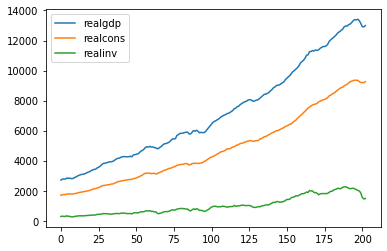

In [ ]:
mdata.plot()

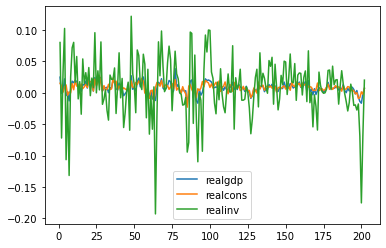

In [ ]:
data = np.log(mdata).diff().dropna()
data.plot()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
#data = sm.datasets.macrodata.load_pandas()
data = mdata[["realgdp", "realcons"]].pct_change().dropna()

In [ ]:
data.head()

In [ ]:
 gc_res = grangercausalitytests(data, 12)

In [ ]:
data = mdata[["realgdp","realcons", "realinv"]].pct_change().dropna()

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(data, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(data,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
realgdp ::  69.55     > 24.2761   =>   True
realcons ::  22.74     > 12.3212   =>   True
realinv ::  2.6       > 4.1296    =>   False


In [ ]:
out = coint_johansen(data,-1,5)
out.lr1

array([69.54948157, 22.74373305,  2.59850753])

In [ ]:
mdata.index = pd.DatetimeIndex(quarterly)

In [ ]:
mdata

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722
...,...,...,...
2008-09-30,13324.600,9267.7,1990.693
2008-12-31,13141.920,9195.3,1857.661
2009-03-31,12925.410,9209.2,1558.494
2009-06-30,12901.504,9189.0,1456.678


In [ ]:
data = np.log(mdata).diff().dropna()

In [ ]:
var = VAR(data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


In [ ]:
x = var.select_order()
x.summary()

,AIC,BIC,FPE,HQIC
0,-27.70,-27.64,9.365e-13,-27.68
1,-28.02,-27.82*,6.747e-13,-27.94*
2,-28.02,-27.66,6.758e-13,-27.88
3,-28.04*,-27.52,6.675e-13*,-27.83
4,-28.02,-27.35,6.779e-13,-27.75
5,-28.01,-27.19,6.844e-13,-27.68
6,-27.96,-26.98,7.235e-13,-27.56
7,-27.92,-26.78,7.530e-13,-27.46
8,-27.92,-26.63,7.503e-13,-27.40
9,-27.94,-26.50,7.368e-13,-27.36


In [ ]:
results = var.fit(3)

In [ ]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 24, Apr, 2022
Time:                     00:38:11
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

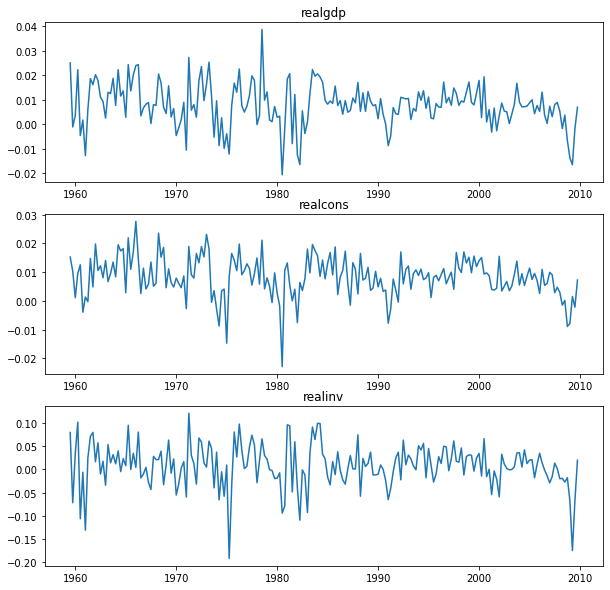

In [ ]:
results.plot();

In [ ]:
resids=results.resid

In [ ]:
data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


In [ ]:
results.resid

,realgdp,realcons,realinv
1960-03-31,0.016715,0.001271,0.112993
1960-06-30,-0.010305,0.003840,-0.105387
1960-09-30,-0.008108,-0.011134,-0.030723
1960-12-31,-0.015052,-0.005031,-0.100613
1961-03-31,0.003314,-0.005423,0.050591
...,...,...,...
2008-09-30,-0.005431,-0.011007,0.018635
2008-12-31,-0.010795,-0.009652,-0.022215
2009-03-31,-0.010914,0.002298,-0.119620
2009-06-30,-0.001214,-0.002571,-0.044309


In [ ]:
results

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
res=durbin_watson(resids)

for col, val in zip(data.columns, res):
    print(col, ':', round(val, 2))

realgdp : 1.96
realcons : 2.02
realinv : 1.95


In [ ]:
lag_order = results.k_ar
lag_order

3

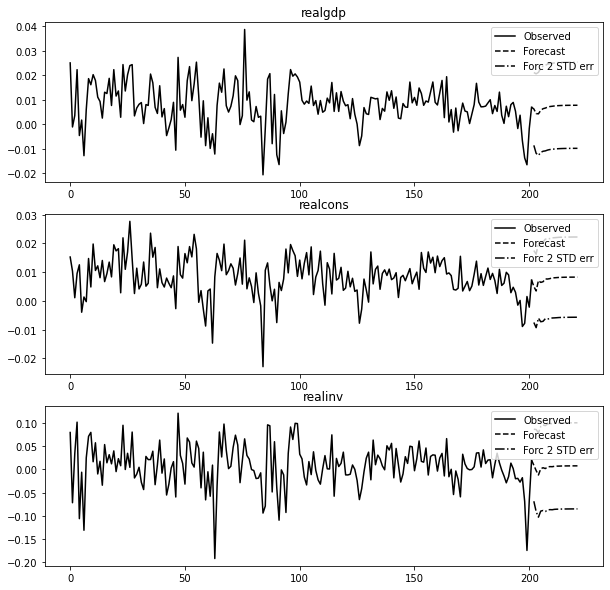

In [ ]:
results.plot_forecast(20);

In [ ]:
fcast = results.forecast(y=forecast_input,steps=199)
forecast = pd.DataFrame(fcast, index=data.index[-199:], columns=data.columns + 'forcasted')
forecast

In [ ]:
lag_order = var.information
print(lag_order) 

#References: 

https://analyticsindiamag.com/hands-on-tutorial-on-vector-autoregressionvar-for-time-series-modeling/